
[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    

Cargamos los datos

In [1]:
df_bike_orig<-read.csv('data/bike-sharing-hour.csv')
head(df_bike_orig)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [2]:
summary(df_bike_orig)

    instant         dteday              season            yr        
 Min.   :    1   Length:17379       Min.   :1.000   Min.   :0.0000  
 1st Qu.: 4346   Class :character   1st Qu.:2.000   1st Qu.:0.0000  
 Median : 8690   Mode  :character   Median :3.000   Median :1.0000  
 Mean   : 8690                      Mean   :2.502   Mean   :0.5026  
 3rd Qu.:13034                      3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :17379                      Max.   :4.000   Max.   :1.0000  
      mnth              hr           holiday           weekday     
 Min.   : 1.000   Min.   : 0.00   Min.   :0.00000   Min.   :0.000  
 1st Qu.: 4.000   1st Qu.: 6.00   1st Qu.:0.00000   1st Qu.:1.000  
 Median : 7.000   Median :12.00   Median :0.00000   Median :3.000  
 Mean   : 6.538   Mean   :11.55   Mean   :0.02877   Mean   :3.004  
 3rd Qu.:10.000   3rd Qu.:18.00   3rd Qu.:0.00000   3rd Qu.:5.000  
 Max.   :12.000   Max.   :23.00   Max.   :1.00000   Max.   :6.000  
   workingday       weathersit         te

In [3]:
str(df_bike_orig)

'data.frame':	17379 obs. of  17 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : chr  "2011-01-01" "2011-01-01" "2011-01-01" "2011-01-01" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 6 6 6 6 6 6 6 6 6 ...
 $ workingday: int  0 0 0 0 0 0 0 0 0 0 ...
 $ weathersit: int  1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ casual    : int  3 8 5 3 0 0 2 1 1 8 ...
 $ registered: int  13 32 27 10 1 1 0 2 7 6 ...
 $ cnt       : int  16 40 32 13 1 1 2 3 8 14 ...


In [4]:
library(dplyr)
df_bike <- df_bike_orig %>% select(-instant) %>% mutate(
    dteday=as.POSIXct(dteday),
    holiday=factor(holiday,labels=c("NO","YES")),
    workingday=factor(workingday,labels=c("NO","YES")),
    hr_i=sin(hr/24*2*pi),
    hr_j=cos(hr/24*2*pi),
    mnth_i=sin(mnth/12*2*pi),
    mnth_j=cos(mnth/12*2*pi),
    weathersit_fct=factor(weathersit)
)
head(df_bike)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,⋯,hum,windspeed,casual,registered,cnt,hr_i,hr_j,mnth_i,mnth_j,weathersit_fct
,<dttm>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<int>,<dbl>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2011-01-01,1,0,1,0,NO,6,NO,1,0.24,⋯,0.81,0.0000,3,13,16,0.0000000,1.0000000,0.5,0.8660254,1
2,2011-01-01,1,0,1,1,NO,6,NO,1,0.22,⋯,0.80,0.0000,8,32,40,0.2588190,0.9659258,0.5,0.8660254,1
3,2011-01-01,1,0,1,2,NO,6,NO,1,0.22,⋯,0.80,0.0000,5,27,32,0.5000000,0.8660254,0.5,0.8660254,1
4,2011-01-01,1,0,1,3,NO,6,NO,1,0.24,⋯,0.75,0.0000,3,10,13,0.7071068,0.7071068,0.5,0.8660254,1
5,2011-01-01,1,0,1,4,NO,6,NO,1,0.24,⋯,0.75,0.0000,0,1,1,0.8660254,0.5000000,0.5,0.8660254,1
6,2011-01-01,1,0,1,5,NO,6,NO,2,0.24,⋯,0.75,0.0896,0,1,1,0.9659258,0.2588190,0.5,0.8660254,2


In [5]:
library(ggplot2)

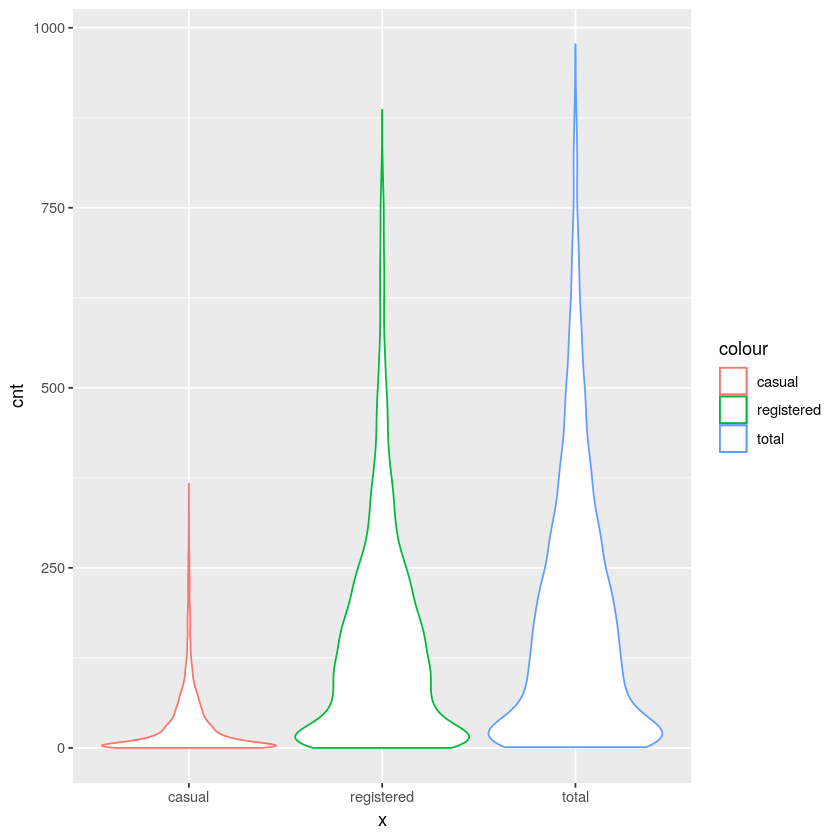

In [6]:
ggplot(df_bike)+geom_violin(aes(x="total",y=cnt,color="total"))+
       geom_violin(aes(x="casual",y=casual,color="casual"))+
       geom_violin(aes(x="registered",y=registered,color="registered"))

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pic

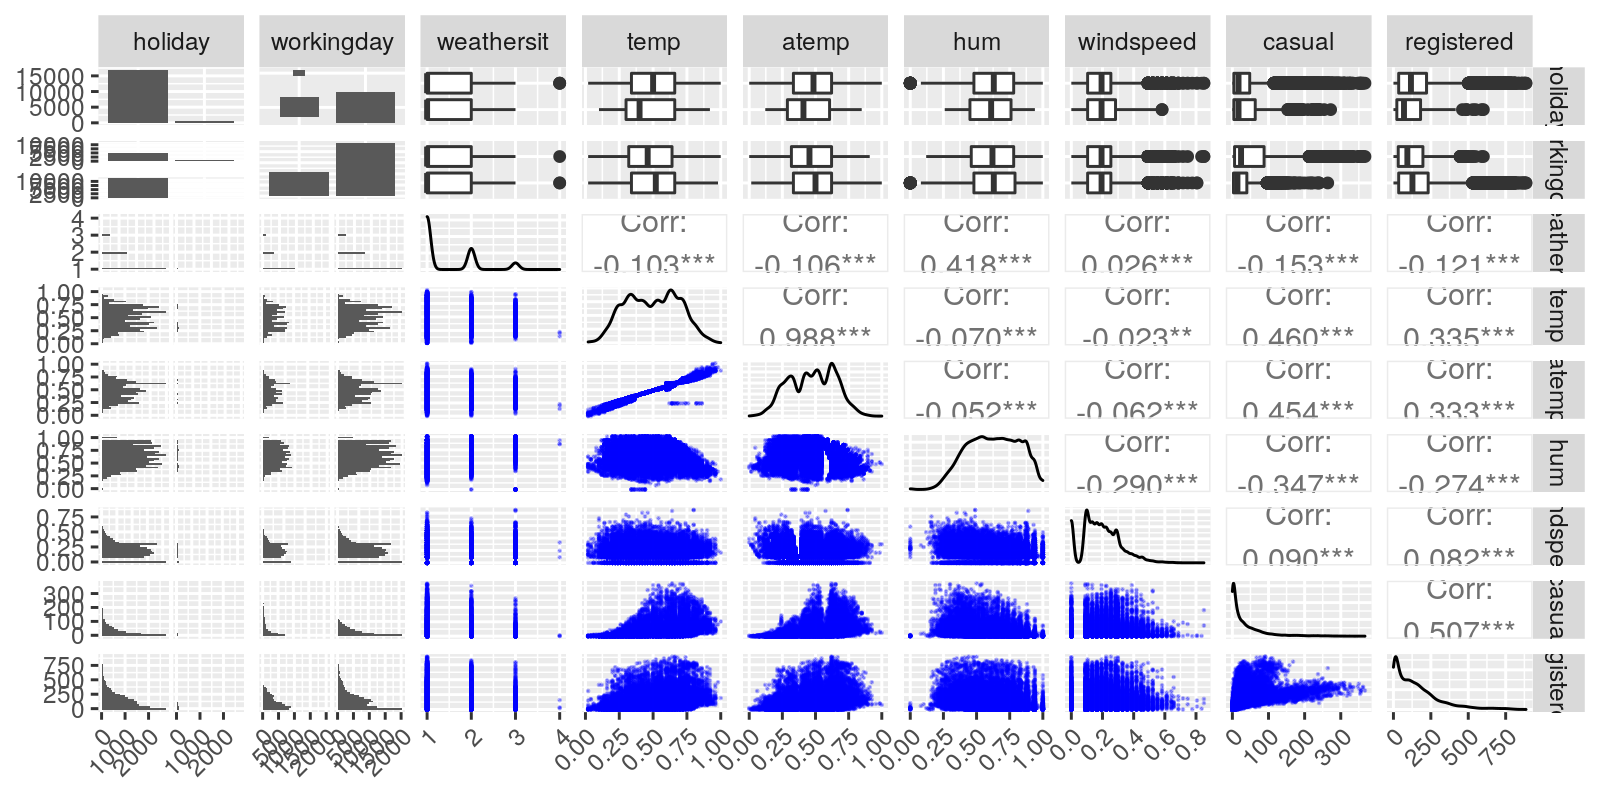

In [7]:
options(repr.plot.height=4,repr.plot.width=8,repr.plot.res = 200)

library(GGally)
options(warn = -1)
ggpairs(df_bike %>% select(holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered), 
        #lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
       lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       ) + theme(axis.text.x = element_text(angle = 45, hjust = 1))

Se ver que existe una gran correlación entre atemp y temp, como cabría esperar.

También vemos que el comportamiento entre usuarios casuales y registrados es diferente. Los usuarios casuales parecen aumentar a medida que hace buen tiempo y parecen bajar con humedad alta más que los usuarios registrados. El viento parece afectar a ambos por igual.

Así que si queremos un modelo para predecir el número de usuarios totales deberíamos crear uno para casuales y otro para registrados.


In [8]:
idx<-sample(1:nrow(df_bike),nrow(df_bike)*0.7)
df_bike.train<- df_bike[idx,]
df_bike.test <- df_bike[-idx,]

In [9]:
model<-lm(df_bike.train, formula=casual~holiday+workingday+weathersit+temp+atemp+hum+windspeed)
summary(model)


Call:
lm(formula = casual ~ holiday + workingday + weathersit + temp + 
    atemp + hum + windspeed, data = df_bike.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.431 -21.602  -3.444  13.775 279.924 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    46.4453     1.9472  23.852  < 2e-16 ***
holidayYES    -11.8344     2.0981  -5.640 1.73e-08 ***
workingdayYES -35.2302     0.7553 -46.645  < 2e-16 ***
weathersit      3.1776     0.5980   5.314 1.09e-07 ***
temp           64.3158    11.2712   5.706 1.18e-08 ***
atemp          61.3736    12.6354   4.857 1.20e-06 ***
hum           -83.6688     2.0633 -40.551  < 2e-16 ***
windspeed       2.8376     3.0256   0.938    0.348    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.52 on 12157 degrees of freedom
Multiple R-squared:  0.421,	Adjusted R-squared:  0.4206 
F-statistic:  1263 on 7 and 12157 DF,  p-value: < 2.2e-16


In [10]:
model<-lm(df_bike.train, formula=casual~holiday+weathersit+atemp+hum+workingday+I(log(windspeed+0.1)))
summary(model)


Call:
lm(formula = casual ~ holiday + weathersit + atemp + hum + workingday + 
    I(log(windspeed + 0.1)), data = df_bike.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-99.696 -21.641  -3.458  13.701 280.430 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              48.2157     1.7946  26.867  < 2e-16 ***
holidayYES              -11.5361     2.0998  -5.494 4.01e-08 ***
weathersit                3.2054     0.5978   5.362 8.40e-08 ***
atemp                   132.5560     1.9949  66.449  < 2e-16 ***
hum                     -84.0406     2.0412 -41.173  < 2e-16 ***
workingdayYES           -35.1353     0.7560 -46.473  < 2e-16 ***
I(log(windspeed + 0.1))   2.2473     0.7640   2.942  0.00327 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.57 on 12158 degrees of freedom
Multiple R-squared:  0.4196,	Adjusted R-squared:  0.4193 
F-statistic:  1465 on 6 and 12158 DF,  p-value: < 2.2e-

In [11]:
df_bike.test$pred<-predict(model,df_bike.test)
caret::postResample(df_bike.test$pred,df_bike.test$casual)

RMSE   Rsquared        MAE 
37.7583150  0.4138439 25.6688285

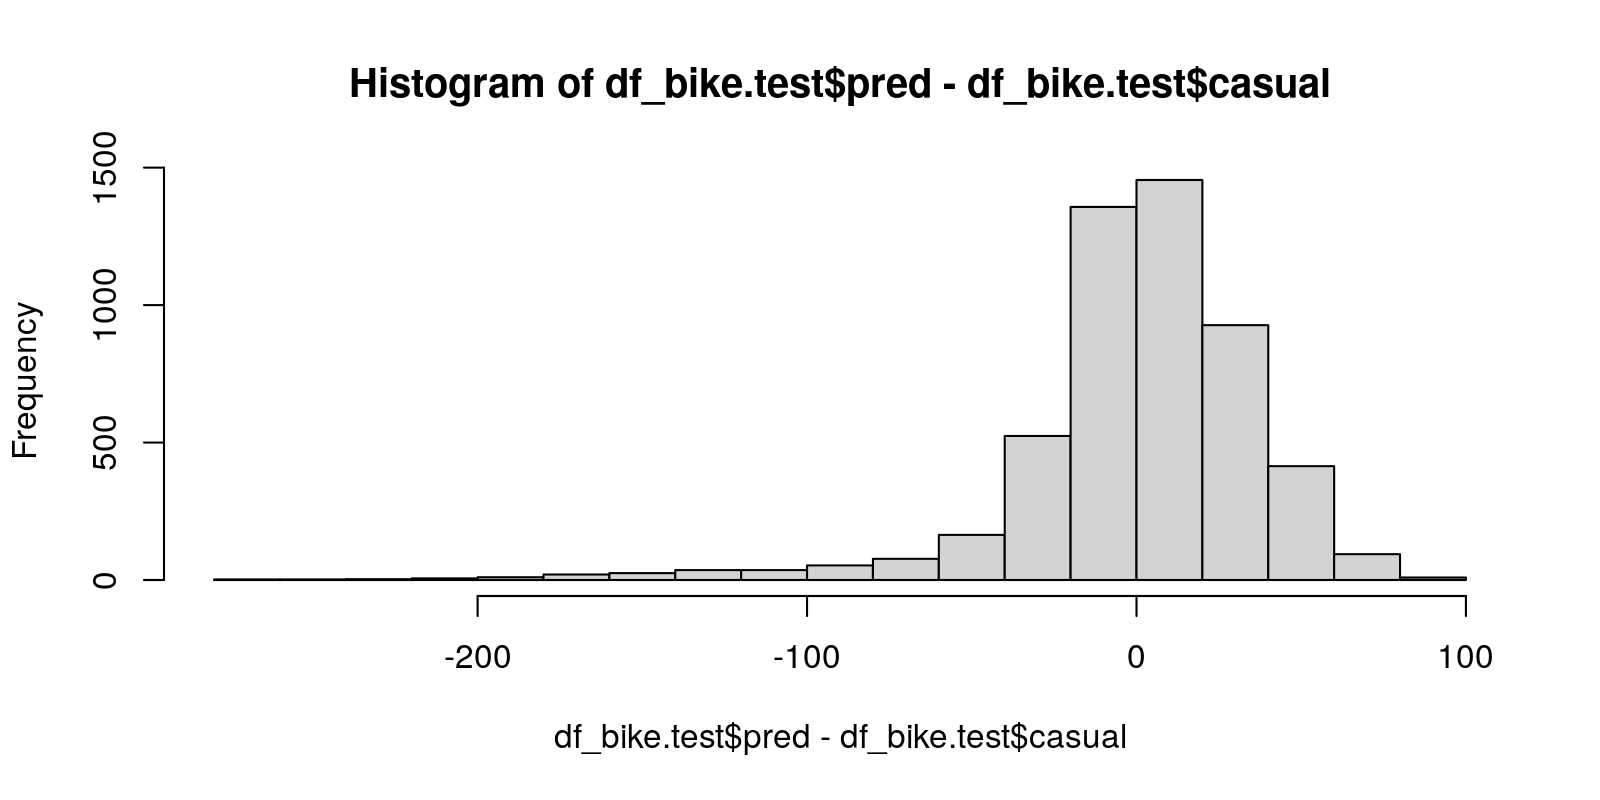

In [12]:
hist(df_bike.test$pred-df_bike.test$casual)

**Possion** 

Como estamos trabajando con conteos, podemos probar una regresión de Poisson.

¿Sería mejor aproximarlo como una regresión de Poisson?

In [13]:
model<-glm(df_bike.train, formula=casual~holiday+weathersit+atemp+hum+workingday+I(log(windspeed+0.1)), 
           family=poisson)
summary(model)


Call:
glm(formula = casual ~ holiday + weathersit + atemp + hum + workingday + 
    I(log(windspeed + 0.1)), family = poisson, data = df_bike.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-18.483   -3.985   -1.528    1.856   24.508  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              3.506452   0.008850  396.23   <2e-16 ***
holidayYES              -0.203235   0.008195  -24.80   <2e-16 ***
weathersit               0.047885   0.003010   15.91   <2e-16 ***
atemp                    3.568848   0.009343  381.96   <2e-16 ***
hum                     -2.142867   0.009164 -233.83   <2e-16 ***
workingdayYES           -0.870891   0.003085 -282.33   <2e-16 ***
I(log(windspeed + 0.1))  0.088938   0.003457   25.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 619150  on 12164  degrees of freedom
Residual dev

In [14]:
df_bike.test$pred<-predict(model,df_bike.test)
caret::postResample(df_bike.test$pred,df_bike.test$casual)

RMSE   Rsquared        MAE 
58.1637596  0.4120222 32.4142362

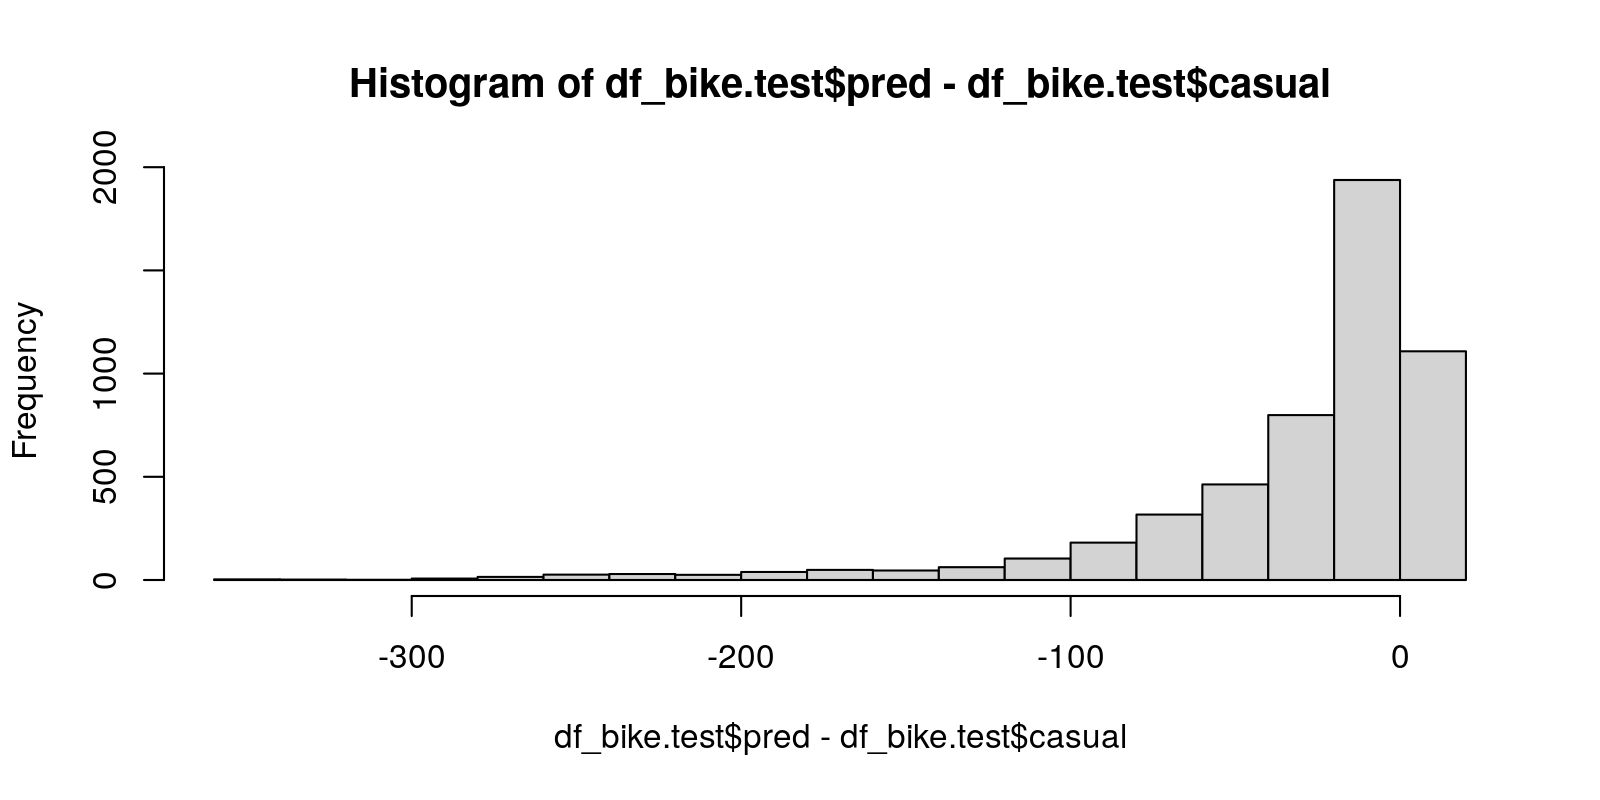

In [15]:
hist(df_bike.test$pred-df_bike.test$casual)

**Más variables**

In [16]:
model<-lm(df_bike.train, formula=casual~holiday+hr_i+hr_j+mnth_i+mnth_j+weathersit+atemp+hum+workingday+I(log(windspeed+0.1)))
summary(model)


Call:
lm(formula = casual ~ holiday + hr_i + hr_j + mnth_i + mnth_j + 
    weathersit + atemp + hum + workingday + I(log(windspeed + 
    0.1)), data = df_bike.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-88.810 -19.384  -3.501  13.341 258.784 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              35.1111     2.1974  15.978  < 2e-16 ***
holidayYES              -10.9717     1.8600  -5.899 3.76e-09 ***
hr_i                    -19.4840     0.4997 -38.991  < 2e-16 ***
hr_j                    -23.2852     0.4740 -49.128  < 2e-16 ***
mnth_i                   -0.4905     0.5839  -0.840 0.400853    
mnth_j                   -3.1151     0.7703  -4.044 5.29e-05 ***
weathersit               -4.3701     0.5449  -8.020 1.15e-15 ***
atemp                    95.2733     3.6496  26.105  < 2e-16 ***
hum                     -28.4411     2.0712 -13.732  < 2e-16 ***
workingdayYES           -34.4953     0.6691 -51.558  < 2e-16 ***
I(log(wi

In [17]:
df_bike.test$pred<-predict(model,df_bike.test)
caret::postResample(df_bike.test$pred,df_bike.test$casual)

RMSE  Rsquared       MAE 
33.002300  0.552253 22.181500

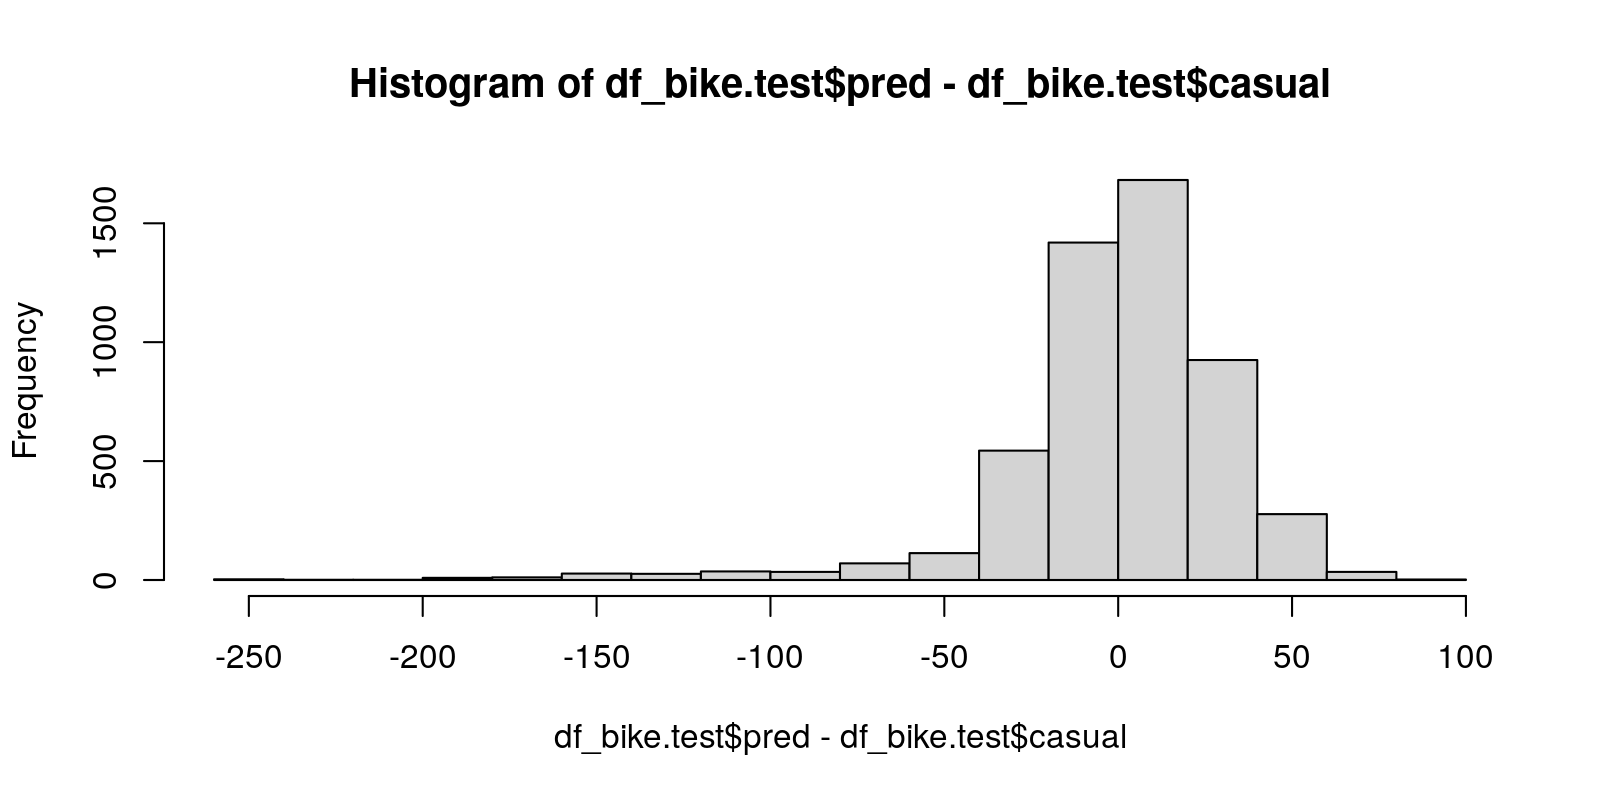

In [18]:
hist(df_bike.test$pred-df_bike.test$casual)

In [19]:
model<-lm(df_bike.train, formula=casual~holiday+hr_i+hr_j+weathersit_fct+atemp+hum+workingday+I(log(windspeed+0.1)))
summary(model)


Call:
lm(formula = casual ~ holiday + hr_i + hr_j + weathersit_fct + 
    atemp + hum + workingday + I(log(windspeed + 0.1)), data = df_bike.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.905 -19.496  -3.367  13.307 257.101 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              26.1956     1.5874  16.502  < 2e-16 ***
holidayYES              -11.6064     1.8571  -6.250 4.25e-10 ***
hr_i                    -18.9750     0.4798 -39.548  < 2e-16 ***
hr_j                    -22.8222     0.4635 -49.237  < 2e-16 ***
weathersit_fct2          -2.9504     0.7398  -3.988 6.71e-05 ***
weathersit_fct3         -10.4470     1.2631  -8.271  < 2e-16 ***
weathersit_fct4           1.3569    23.5065   0.058  0.95397    
atemp                   106.1533     1.8263  58.125  < 2e-16 ***
hum                     -28.8148     2.0498 -14.057  < 2e-16 ***
workingdayYES           -34.5926     0.6686 -51.739  < 2e-16 ***
I(log(windspeed + 0.1))  -1

In [20]:
df_bike.test$pred<-predict(model,df_bike.test)
caret::postResample(df_bike.test$pred,df_bike.test$casual)

RMSE   Rsquared        MAE 
32.9786681  0.5529129 22.1334725

**boxcox**

Vamos a tratar de aplicar una transformación boxcox en nuestra variable dependiente


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




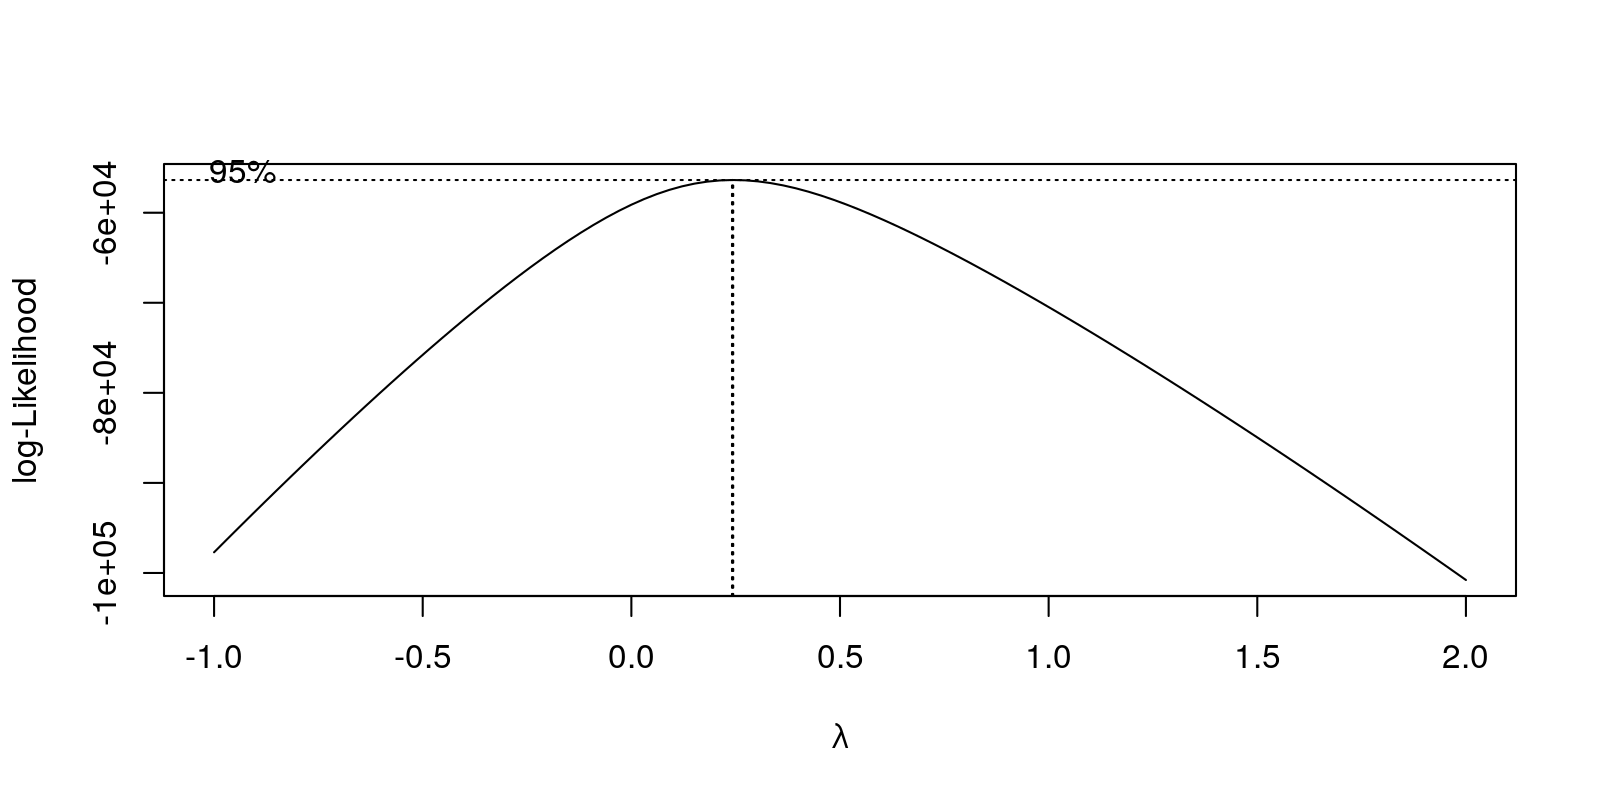

In [21]:
library(MASS)
model<-lm(df_bike.train, formula=casual+0.1~holiday+hr_i+hr_j+weathersit_fct+atemp+hum+workingday+I(log(windspeed+0.1)))
bx<-boxcox(model,lambda=seq(-1,2,length.out = 100))

In [22]:
l<-bx$x[which.max(bx$y)]
my_transform<-function(y,l){
    (y^l-1)/l
}
my_inv_transform<-function(x,l){
    (x*l+1)^(1/l)
}
l

[1] 0.2424242

In [23]:
df_bike_transformed.train<-df_bike.train
df_bike_transformed.train$casual_tr<-my_transform(df_bike_transformed.train$casual,l)

In [24]:
model<-lm(df_bike_transformed.train, formula=casual_tr~holiday+hr_i+hr_j+weathersit_fct+atemp+hum+workingday+I(log(windspeed+0.1)))
summary(model)


Call:
lm(formula = casual_tr ~ holiday + hr_i + hr_j + weathersit_fct + 
    atemp + hum + workingday + I(log(windspeed + 0.1)), data = df_bike_transformed.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0072  -1.1340   0.2582   1.3924   7.4086 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.06435    0.09627  11.056  < 2e-16 ***
holidayYES              -0.62697    0.11263  -5.567 2.65e-08 ***
hr_i                    -2.16255    0.02910 -74.318  < 2e-16 ***
hr_j                    -2.21196    0.02811 -78.684  < 2e-16 ***
weathersit_fct2         -0.17806    0.04487  -3.968 7.28e-05 ***
weathersit_fct3         -1.60243    0.07661 -20.918  < 2e-16 ***
weathersit_fct4         -0.14441    1.42563  -0.101 0.919316    
atemp                    9.08109    0.11076  81.987  < 2e-16 ***
hum                     -0.55701    0.12432  -4.481 7.51e-06 ***
workingdayYES           -1.80078    0.04055 -44.410  < 2e-16 ***
I(

In [25]:
df_bike.test$pred_tr<-predict(model,df_bike.test)
df_bike.test$pred<-my_inv_transform(df_bike.test$pred_tr,l)
caret::postResample(df_bike.test$pred,df_bike.test$casual)

RMSE   Rsquared        MAE 
30.2956792  0.6311451 16.3354722

In [ ]:
hist(df_bike.test$pred-df_bike.test$casual,breaks=30)